<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/ML%2CDL/14)PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***6-3 주성분 분석***

# **줄거리**

#Note

#**코드**


In [ ]:
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1yz1qKGabybR8OK80zmS8HumzXHwGWYTl' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1yz1qKGabybR8OK80zmS8HumzXHwGWYTl" -O fruits_300.npy && rm -rf ~/cookies.txt
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100) 

--2021-05-20 12:25:56--  https://docs.google.com/uc?export=download&confirm=&id=1yz1qKGabybR8OK80zmS8HumzXHwGWYTl
Resolving docs.google.com (docs.google.com)... 142.250.157.113, 142.250.157.100, 142.250.157.101, ...
Connecting to docs.google.com (docs.google.com)|142.250.157.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-0o-docs.googleusercontent.com/docs/securesc/15a15lv40tkmji8ejj3vlgk28k8p28lg/stn546hq54sok36tfsvusi9oi1l6bqr2/1621513500000/00938465259172028412/00300797501725730451Z/1yz1qKGabybR8OK80zmS8HumzXHwGWYTl?e=download [following]
--2021-05-20 12:25:57--  https://doc-0g-0o-docs.googleusercontent.com/docs/securesc/15a15lv40tkmji8ejj3vlgk28k8p28lg/stn546hq54sok36tfsvusi9oi1l6bqr2/1621513500000/00938465259172028412/00300797501725730451Z/1yz1qKGabybR8OK80zmS8HumzXHwGWYTl?e=download
Resolving doc-0g-0o-docs.googleusercontent.com (doc-0g-0o-docs.googleusercontent.com)... 64.233.188.132, 2404:6800:4008:c00::84
Connecting

In [ ]:
from sklearn.decomposition import  PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.components_.shape)
print(pca.components_[0].shape)

(50, 10000)
(10000,)


In [ ]:
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
  n = len(arr)    # n은 샘플 개수
  rows = int(np.ceil(n/10))    # 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
  cols = n if rows < 2 else 10    # 행이 1개이면 열의 개수는 샘플 개수. 아니라면 10개
  fig, axs = plt.subplots(rows, cols,
                          figsize=(cols*ratio, rows*ratio),
                          squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:    # n개 까지만 그림
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

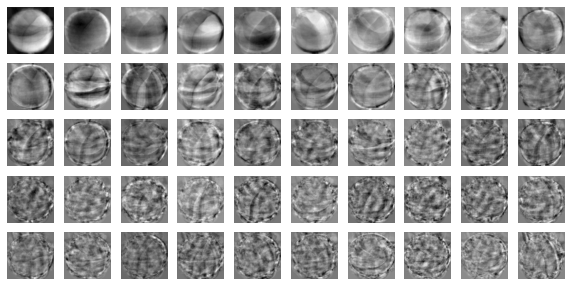

In [ ]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [ ]:
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)


(300, 10000)
(300, 50)


In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


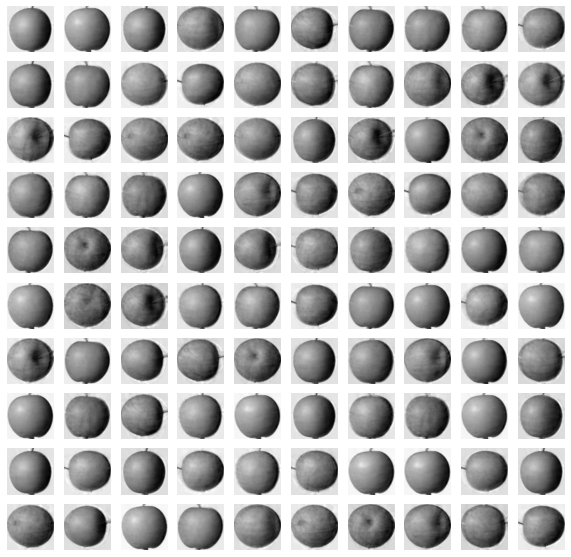

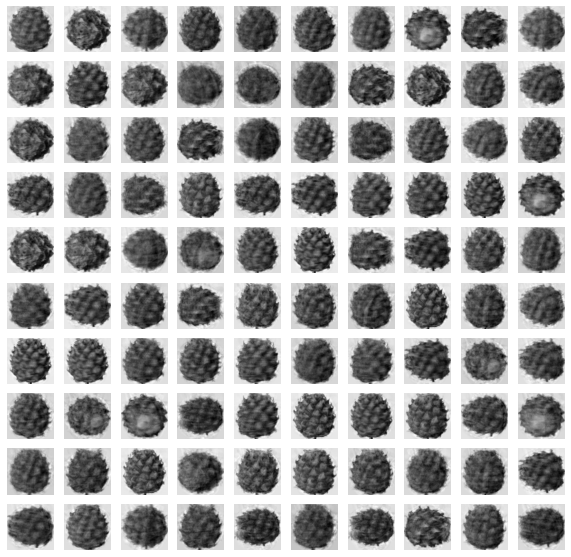

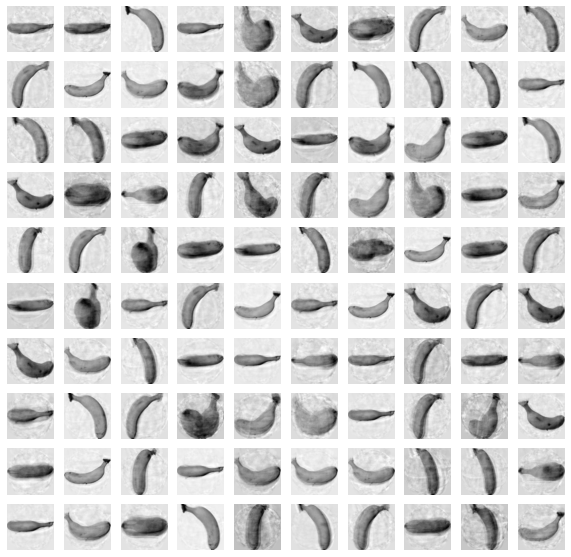

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215912512918714


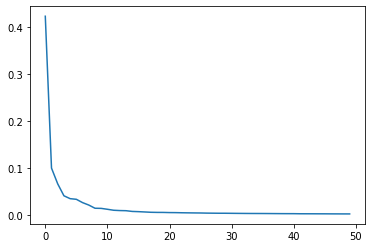

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
target = np.array([0]*100+[1]*100+[2]*100)

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.361916732788086


In [ ]:
scores_pca = cross_validate(lr,fruits_pca,target)
print(np.mean(scores_pca['test_score']))
print(np.mean(scores_pca['fit_time']))

1.0
0.02604365348815918


In [ ]:
pca=PCA(n_components=0.5)
pca.fit(fruits_2d)

print(pca.n_components_)

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04132676124572754


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


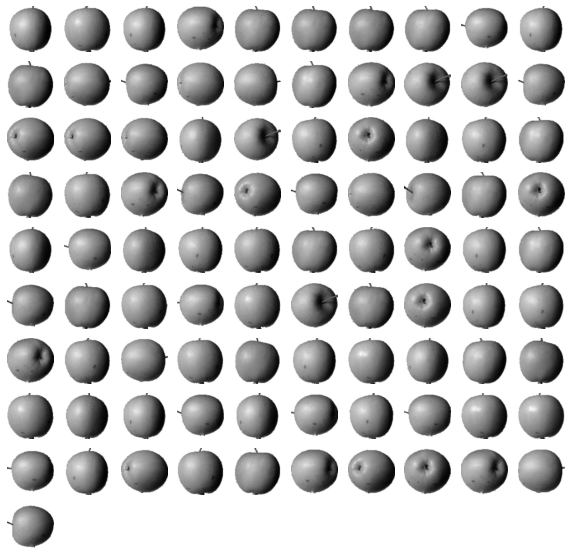

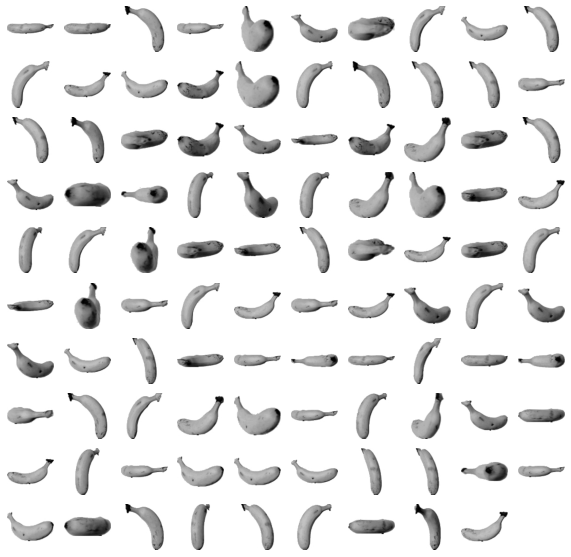

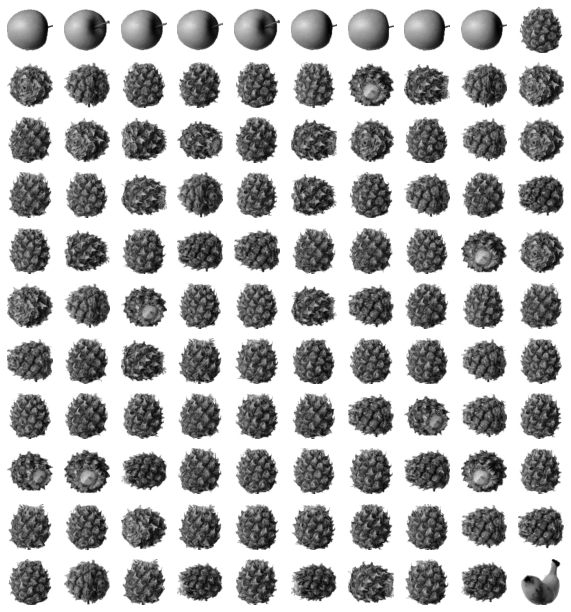

In [ ]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

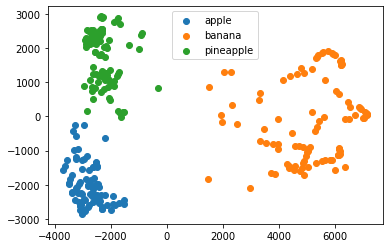

In [ ]:
for label in range(0,3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()